In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show


# Y variable analysis

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

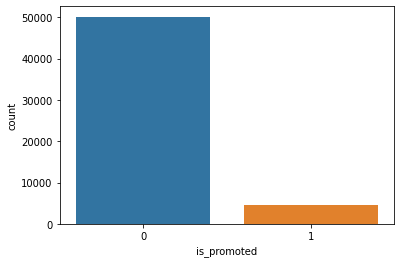

In [2]:
train=pd.read_csv("train_hr.csv",index_col = "employee_id")
datos = train.copy()

datos.head()

datos.is_promoted.value_counts()/datos.is_promoted.size
sns.countplot(x= "is_promoted",data = datos)
#Approximately 9% of the workforce is promoted

### Bi-variable analysis

##### Y with DEPARTMENT

In [3]:
# Percentage of personnel in each department
100 * datos['department'].value_counts() / len(datos['department'])


department
Sales & Marketing    30.725442
Operations           20.705007
Technology           13.023646
Procurement          13.023646
Analytics             9.764998
Finance               4.627062
HR                    4.411765
Legal                 1.895709
R&D                   1.822727
Name: count, dtype: float64

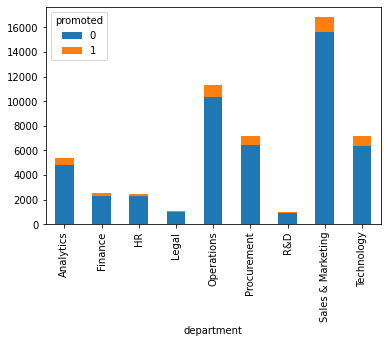

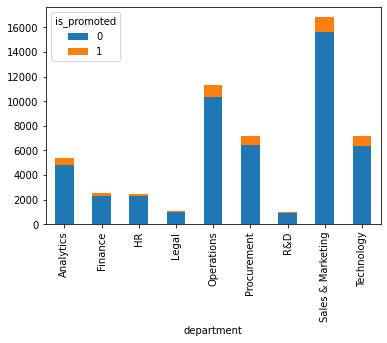

In [5]:
cross_tab=pd.crosstab(index=datos['department'], columns=datos['is_promoted'], margins=False)

pd.crosstab(datos['department'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1) 

cross_tab.plot.bar(stacked=True)

plt.legend(title='promoted')

cross_tab.plot.bar(stacked=True)

plt.show()


## Takeaways

Approx 9% of the workforce is promoted

Promotion percentage related to deparment between 5% and 10%

The smaller the deparment, less promotion possibilities


#### Y with operations

In [6]:
100 * datos['region'].value_counts() / len(datos['region'])

region
region_2     22.520435
region_22    11.728215
region_7      8.836301
region_15     5.123340
region_13     4.831411
region_26     4.123486
region_31     3.530506
region_4      3.107211
region_27     3.026930
region_16     2.672967
region_28     2.404758
region_11     2.399285
region_23     2.143848
region_29     1.813604
region_32     1.724201
region_19     1.594658
region_20     1.550868
region_14     1.508904
region_25     1.494307
region_17     1.452343
region_5      1.397606
region_6      1.258940
region_30     1.198730
region_8      1.195081
region_10     1.182309
region_1      1.112976
region_24     0.926872
region_12     0.912276
region_9      0.766311
region_21     0.749891
region_3      0.631295
region_34     0.532769
region_33     0.490804
region_18     0.056561
Name: count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

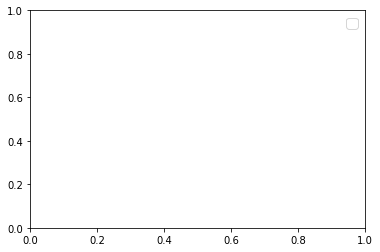

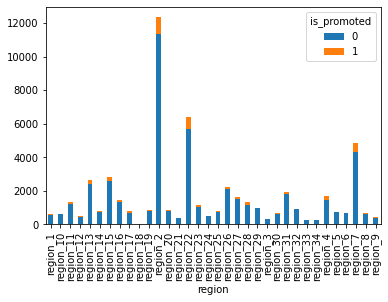

In [8]:
cross_tab_region=pd.crosstab(index=datos['region'], columns=datos['is_promoted'], margins=False)

pd.crosstab(datos['region'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1) 

plt.legend(["This is my legend"], fontsize="x-large")

cross_tab_region.plot.bar(stacked=True)
plt.show


Takeaway of region category: 3 main regions

#### Y with Education
Education column has missings, so first we will treat the missings

In [9]:
datos.isnull().sum()/datos.isnull().count() #Education has missings

department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [14]:
datos.education.value_counts()
#Bachelor's is the most common option, so i input missing values to Bachelor's


education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [15]:
datos.education.fillna("Bachelor's",inplace = True)

In [18]:
100 * datos['education'].value_counts() / len(datos['education'])

education
Bachelor's          71.299810
Master's & above    27.231426
Below Secondary      1.468764
Name: count, dtype: float64

is_promoted           0     1
education                    
Bachelor's        35948  3130
Below Secondary     738    67
Master's & above  13454  1471
 Porcentajes de ascenso:
 is_promoted              0         1
education                           
Bachelor's        0.919904  0.080096
Below Secondary   0.916770  0.083230
Master's & above  0.901441  0.098559


<AxesSubplot:xlabel='education'>

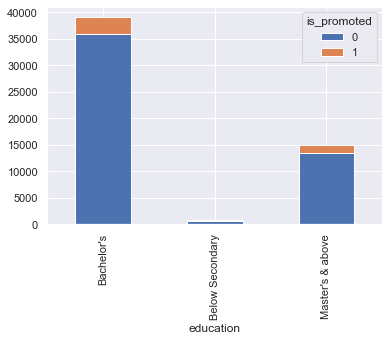

In [40]:
cross_tab_education=pd.crosstab(index=datos['education'], columns=datos['is_promoted'], margins=False)

print(" Porcentajes de ascenso:\n",pd.crosstab(datos['education'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1)) 

cross_tab_education.plot.bar(stacked=True)

#### # Y with Gender

In [42]:
100 * datos['gender'].value_counts() / len(datos['gender'])

gender
m    70.237921
f    29.762079
Name: count, dtype: float64

 Porcentajes de ascenso:
 is_promoted         0         1
gender                         
f            0.910066  0.089934
m            0.916849  0.083151


<AxesSubplot:xlabel='gender'>

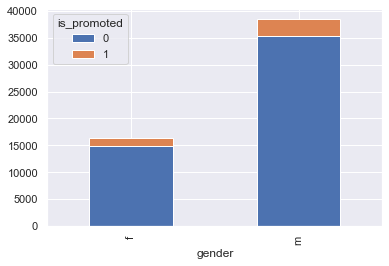

In [43]:


cross_tab_gender = pd.crosstab(index=datos['gender'], columns=datos['is_promoted'], margins=False)

print(" Porcentajes de ascenso:\n",pd.crosstab(datos['gender'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1))

cross_tab_gender.plot.bar(stacked=True)

#### Y with recruitment_channel

In [44]:
100 * datos['recruitment_channel'].value_counts() / len(datos['recruitment_channel'])

recruitment_channel
other       55.550285
sourcing    42.366078
referred     2.083637
Name: count, dtype: float64

 Porcentajes de ascenso:
 is_promoted                 0         1
recruitment_channel                    
other                0.916048  0.083952
referred             0.879159  0.120841
sourcing             0.914987  0.085013


<AxesSubplot:xlabel='recruitment_channel'>

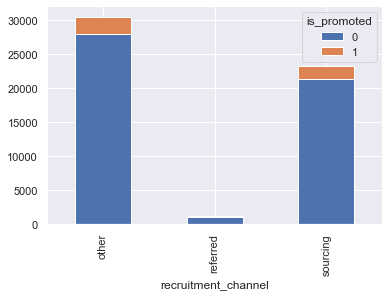

In [47]:
cross_tab_channel = pd.crosstab(index=datos['recruitment_channel'], columns=datos['is_promoted'], margins=False)

print(" Porcentajes de ascenso:\n",pd.crosstab(datos['recruitment_channel'], datos['is_promoted']).apply(lambda r: r/r.sum(), axis=1))
cross_tab_channel.plot.bar(stacked=True)

## Y with numerical variables

### Y with no_of_trainings

In [60]:
datos["no_of_trainings"]



employee_id
65438    1
65141    1
7513     1
2542     2
48945    1
        ..
3030     1
74592    1
13918    1
13614    1
51526    1
Name: no_of_trainings, Length: 54808, dtype: int64

In [16]:

datos.previous_year_rating.value_counts()
#3.0 Is the most common result, same procedure

previous_year_rating
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [17]:
datos.previous_year_rating.fillna(3.0,inplace = True)